# Tutoriel de résolution d'un problème de machine learning : estimation du prix d'un bien

## Problématique étudiée

La problématique étudiée est le cas avec le dataset California Housing. L'objectif de ce cas est d'estimer le rpix d'un bien à partir des paramètres d'entrée donnés dans ce dataset.

Il s'agit donc d'un cas de **machine learning supervisé**, et plus spécifiquement d'un cas de **régression**.

Ce notebook va vous guider à travers ce cas concret de régression, et va utiliser un modèle particulier de machine learning pour réaliser cette tâche : les *multiple regression*. Les parties suivantes sont dédiées à l'implémentation de ce modèle grâce à l'utilisation de la librairie scikit-learn.

## Code

### Importation des différentes librairies 

In [218]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

### Importation du dataset 

La première étape est d'importer le dataset et de voir de quoi il est constitué. Ici on importe le dataset california housing.

In [142]:
california_housing = fetch_california_housing(as_frame=True)
california_housing.data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [143]:
california_housing.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

Ce dataset comporte 20640 lignes et 8 colonnes avec des data numériques. 
Features du dataset : MedInc HouseAge AveRooms AveBedrms Population AveOccup Latitude Longitude     
Target du dataset : MedHouseVal (expressed in hundreds of thousands of dollars ($100,000))

In [175]:
california_housing.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


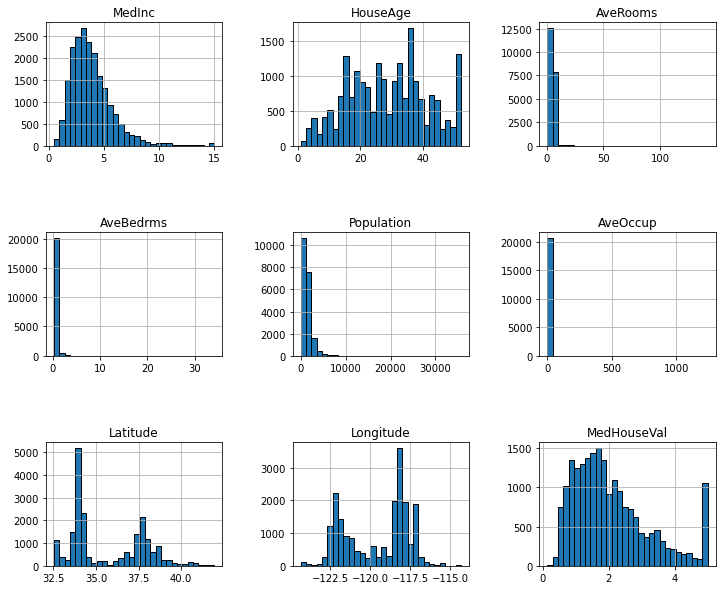

In [146]:
california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

<AxesSubplot:>

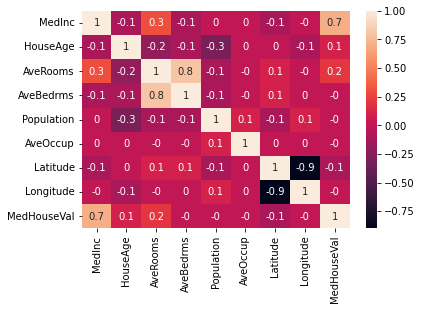

In [147]:
matrice_corr = california_housing.frame.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

In [205]:
Features_X = california_housing.data
Target_y = california_housing.target

On sépare nos données en deux parties : données de tests et données d'entrainements

In [231]:
# Split the data into training/testing sets
Features_X_train = Features_X[:-200]
Features_X_test = Features_X[-200:]
# Split the targets into training/testing sets
Target_y_train = Target_y[:-200]
Target_y_test = Target_y[-200:]

On créer le model 

In [232]:
# Create linear regression object
regr = linear_model.LinearRegression()

Entrainement du modèle 

In [260]:
# Train the model using the training sets
regr.fit(Features_X_train, Target_y_train)

# Make predictions using the testing set
Target_y_pred = regr.predict(Features_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Target_y_test, Target_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Target_y_test, Target_y_pred))


Coefficients: 
 [ 4.37395347e-01  9.43450592e-03 -1.07131346e-01  6.44208131e-01
 -4.87109755e-06 -3.78622950e-03 -4.22235910e-01 -4.35035000e-01]
Mean squared error: 0.33
Coefficient of determination: 0.54


### Test avec 1 seule feature

Coefficients: 
 [0.41790673]
Mean squared error: 0.48
Coefficient of determination: 0.32


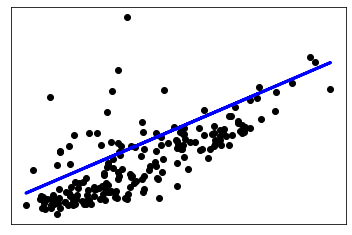

In [230]:
MedInc_X = np.array(california_housing.data.MedInc.values)[:,np.newaxis]
Target2_y = np.array(california_housing.target)

# Split the data into training/testing sets
MedInc_X_train = MedInc_X[:-200]
MedInc_X_test = MedInc_X[-200:]

# Split the targets into training/testing sets
Target2_y_train = Target2_y[:-200]
Target2_y_test = Target2_y[-200:]

# Create linear regression object
regr2 = linear_model.LinearRegression()

# Train the model using the training sets
regr2.fit(MedInc_X_train, Target2_y_train)

# Make predictions using the testing set
Target2_y_pred = regr2.predict(MedInc_X_test)

# The coefficients
print("Coefficients: \n", regr2.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Target2_y_test, Target2_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Target2_y_test, Target2_y_pred))

# Plot outputs
plt.scatter(MedInc_X_test, Target2_y_test, color="black")
plt.plot(MedInc_X_test, Target2_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Test avec différent pourcentage de données d'entrainments

In [257]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(
    MedInc_X, Target2_y, test_size=0.02, shuffle=False
)

Coefficients: 
 [0.41790673]
Mean squared error: 0.52
Coefficient of determination: 0.53


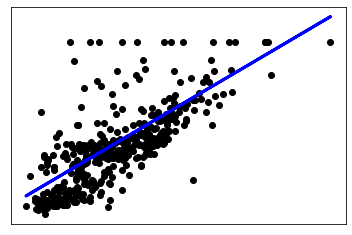

In [258]:
# Create linear regression object
regr3 = linear_model.LinearRegression()

# Train the model using the training sets
regr3.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = regr3.predict(X_test)

# The coefficients
print("Coefficients: \n", regr2.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Test avec 3 features : MedInc,HouseAge,AveRooms

In [241]:
Three_features_X = np.array(california_housing.data[['MedInc','HouseAge','AveRooms']])
Target3_y = np.array(california_housing.target)

In [244]:

Three_features_X_train, Three_features_X_test, Target3_y_train, Target3_y_test = train_test_split(
    Three_features_X, Target3_y, test_size=0.2, shuffle=False
)

# Create linear regression object
regr3 = linear_model.LinearRegression()

# Train the model using the training sets
regr3.fit(Three_features_X_train, Target3_y_train)

# Make predictions using the testing set
Target3_y_pred = regr3.predict(Three_features_X_test)

# The coefficients
print("Coefficients: \n", regr3.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Target3_y_test, Target3_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Target3_y_test, Target3_y_pred))


Coefficients: 
 [ 0.43328644  0.01761171 -0.02357317]
Mean squared error: 0.66
Coefficient of determination: 0.55
